In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
import cv2
from google.colab.patches import cv2_imshow
from skimage.filters import gaussian

In [2]:
image = cv2.imread("img3.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
s = np.linspace(0, 2*np.pi, 300)
r = (gray_image.shape[0]/2) + 350*np.sin(s)
c = (gray_image.shape[1]/2) + 350*np.cos(s)
init = np.array([r, c]).T

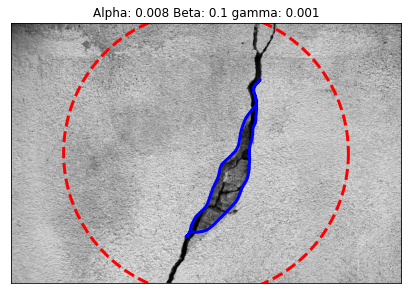

In [32]:
alpha = 0.008
beta = 0.1
gamma = 0.001
snake = active_contour(gaussian(gray_image, 3, preserve_range=False),init, alpha=alpha, beta=beta, gamma=gamma)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
title = "Alpha: " + str(alpha) + " Beta: " + str(beta) + " gamma: " + str(gamma)
ax.set_title(title)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_image.shape[1], gray_image.shape[0], 0])

plt.show()